# (공부) 논문 리뷰
> Learning Deep Features for Discriminative Localization

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김하영
- categories: [Study]

---

- CNN과 CAM을 사용해 CAT/DOG을 분류하고 분류한 이유를 시각화하였음.
- 이번 논문 리뷰를 통해 CAT/DOG을 구분하는 과정을 보다 세부적으로 이해하고 수식으로 나타내보고자 함.

---

### Introduction

- CNN의 레이어는 크게 두 가지 부분으로 분류되며, 이미지 분류기처럼 사용됨.

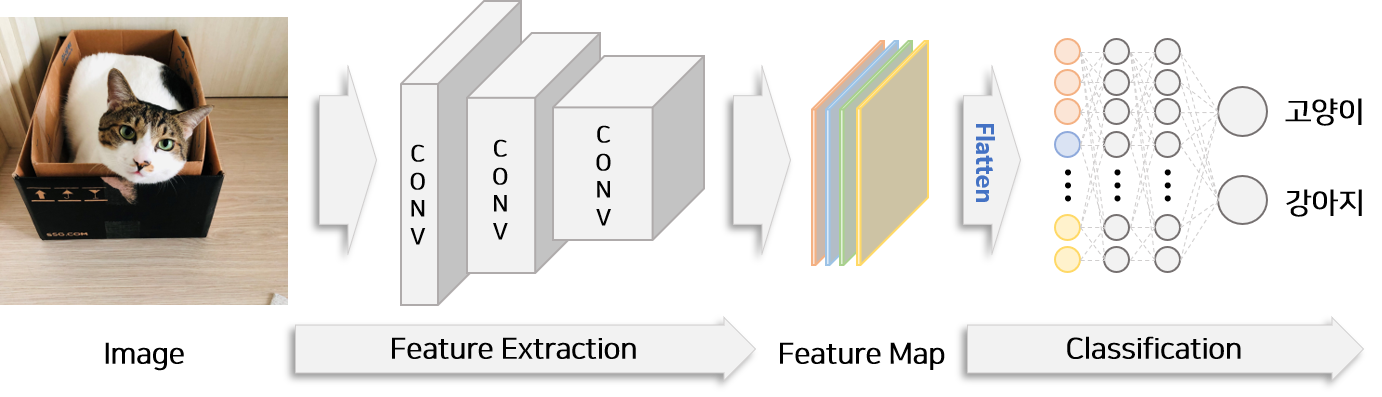

1. Convolution/Pooling 메커니즘은 이미지를 형상으로 분할하고 분석. $\to$ `Feature Extraction`
  
2. FC(Fully Connected Layer)로, 이미지를 분류/설명하는데 가장 적합하게 예측. $\to$ `Classification`
   
   1) Feature Map이 Flatten된 2차원 배열 형태의 이미지를 1차원 배열로 `평탄화`
   2) 활성화 함수(Relu, Leaky Relu, Tanh,등)뉴런을 `활성화`
   3) 분류기(Softmax) 함수로 `분류`  
        
- 하지만 Feature Map은 FC를 통과할 때 위치정보가 소실되므로 이 구조에서는 위치정보를 추출할 수 없음.

- 따라서 본 논문은 아래와 같은 모델 구조를 제안함. $\to$ **GAP(Global Average Pooling)** 를 포함시킨 모델
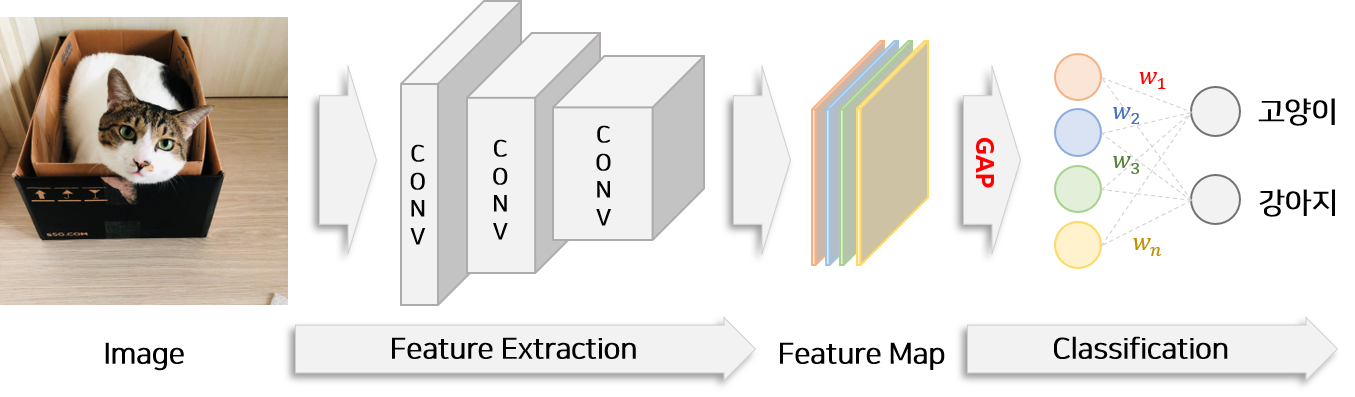
- global average pooling : 구조적 정규화 역할을 하여 훈련 중 과적합을 방지함.
- 본 논문에 따르면 GAP를 활용할 경우 약간의 수정만 있으면 마지막 FC를 통과할 때 위치정보를 잃지 않는다고 함.
- 따라서 CAM(Class Activation Mapping)을 활용해 각 클래스로 분류될 확률에 영향을 미친 객체의 좌표를 아래와 같이 시각화할 수 있음.
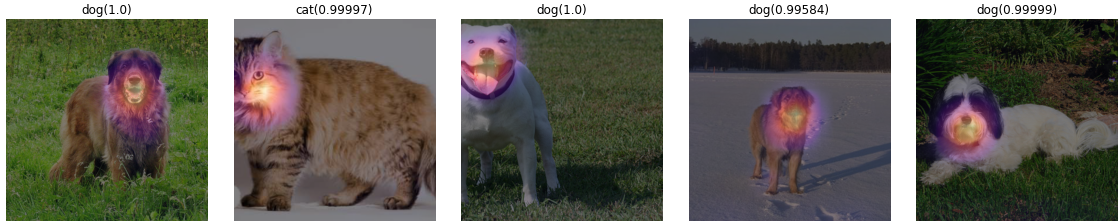

---

### GAP (Global Averagte Pooling)

- GAP는 각 Feature Map의 가로, 세로 값을 모두 더해 1개의 특징변수 $F_k$를 출력함.  
$\sum_{x,y} f_k(x,y)=F_x$  

- 클래스 c에 대한 softmax함수 입력값 $S_c$은 특징변수와 Weight를 곱하여 계산함.  
$S_c = \sum_k w^c_k F_k$  

- softmax 함수에 입력값을 넣어 계산한 결과 $P_c$=각 클래스로 분류될 확률이 도출됨.  
$P_c = \frac{exp(S_c)}{\sum_c exp(S_c)}$

$k$ : Feture Map의 index  
$x,y$ : Feature Map의 가로(x), 세로(y) 좌표  
$f_k(x,y)$ : k번째 Feature Map의 visual pattern  
$F_k$ : k번째 Feature Map의 특징변수  
$w^c_k$ : 클래스 c에 k번째 Feature Map의 특징변수가 얼마나 중요한지를 보여주는 값

---

### CAM (Class Activation Mapping)

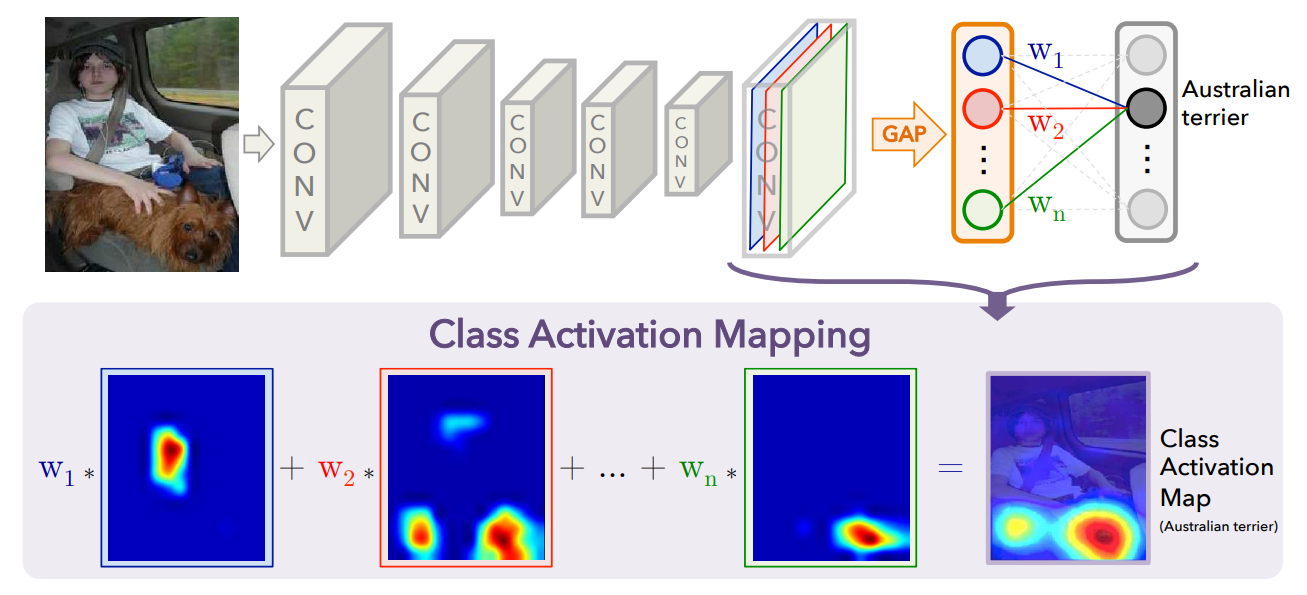

- 클래스 c에 대한 Class Activation Map $M_c$는 k번째 Feature Map의 각 가로, 세로 값에 weight를 곱한 값을 더한 것과 같음.  
$M_c(x,y) = \sum_k w^c_k f_k(x,y) \to S_c = \sum_{x,y} M_c(x,y)$

- Class Activation Map을 입력 이미지의 크기로 복구하여 가장 관련이 있는 이미지 영역을 식별할 수 있음.

---

- ref
1) Zhou, Bolei, et al. "Learning deep features for discriminative localization." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.
2) https://joungheekim.github.io/2020/09/29/paper-review/
3) https://blog.naver.com/PostView.nhn?blogId=intelliz&logNo=221709190464
4) https://wiserloner.tistory.com/1149